In [357]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.makedirs("plots", exist_ok=True)

In [358]:
classified_other = pd.read_csv('mentioned_other_reacted_mentioned.csv',  delimiter=';', encoding='utf-8')
classified_same = pd.read_csv('mentioned_same_reacted.csv',  delimiter=';', encoding='utf-8')

In [359]:
def categorize_sentence(sentence_class):
    categories = []
    for category in sentence_class.split(','):
        category = category.strip().lower()

        if 'accusation' in category:
            categories.append('Accusation')
        elif 'rejection' in category:
            categories.append('Rejection')
        elif 'self-representation' in category:
            categories.append('Self-representation')
        elif 'report' in category:
            categories.append('Report')
        elif 'demand' in category:
            categories.append('Demand')
        elif 'expressive' in category:
            categories.append('Expressive')
        elif 'support' in category:
            categories.append('Support')
        elif 'promise' in category:
            categories.append('Promise')
        elif 'evaluation' in category:
            categories.append('Evaluation')
        elif 'request' in category:
            categories.append('Request')
        elif 'rhetorical question' in category:
            categories.append('Rhetorical Question')
        elif 'informative question' in category:
            categories.append('Informative Question')

    return categories

In [360]:
def categorize_interjection(interjection_class):
    categories = []

    for category in interjection_class.split(','):
        category = category.strip().lower()

        if 'memoranda' in category:
            categories.append('Memoranda')
        elif 'evaluativa' in category:
            categories.append('Evaluativa')
        elif 'dissentiva' in category:
            categories.append('Dissentiva')
        elif 'affirmativa' in category:
            categories.append('Affirmativa')
        elif 'direktiva' in category:
            categories.append('Direktiva')
        elif 'erotetika' in category:
            categories.append('Erotetika')
    return categories

In [361]:
classified_same

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,Sentences,Mentioned parties,Interjection Type,Interjecting Party,Interjecting Person,Interjection Content,Specific Class,Sentence Class (Reinig),Interjection Class (Burkhardt),Sentence finished
0,BT_19_235.xml,19,23.06.2021,Befragung der Bundesregierung,32527,4,Katja Mast,mp,weiblich,SPD,Wir von der SPD lehnen dies ab.,['SPD'],Nonverbal,SPD,all,NaN,Beifall,Rejection,NaN,True
1,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,14,Nicole Höchst,mp,weiblich,AfD,Man möchte die Alternative für Deutschland so ...,['AfD'],Verbal,SPD,Marianne Schieder,Alternative für Deutschland? Schrecken für Deu...,Zuruf,Accusation,Evaluativa,False
2,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,14,Nicole Höchst,mp,weiblich,AfD,Man möchte die Alternative für Deutschland so ...,['AfD'],Verbal,SPD,Dr. Karamba Diaby,Reden Sie zum Thema! Was hat denn das mit dem ...,Zuruf,Accusation,Memoranda,False
3,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,18,Nicole Höchst,mp,weiblich,AfD,Man maß zudem bei Anträgen im Zusammenhang mit...,['AfD'],Verbal,DIE LINKE,Nicole Gohlke,NaN,Zuruf,"Accusation, Report",NaN,True
4,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,18,Nicole Höchst,mp,weiblich,AfD,Man maß zudem bei Anträgen im Zusammenhang mit...,['AfD'],Verbal,GRUENE,Ulle Schauws,NaN,Zuruf,"Accusation, Report",NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,BT_19_239.xml,19,07.09.2021,a) Zweite und dritte Beratung des von den Frak...,33026,1,Sabine Dittmar,mp,weiblich,SPD,"Herr Gesundheitsminister Spahn, wären Sie glei...",['SPD'],Nonverbal,SPD,all,NaN,Beifall,"Accusation, Self-Representation",NaN,True
140,BT_19_239.xml,19,07.09.2021,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,Deshalb sind wir als SPD-Bundestagsfraktion un...,['SPD'],Nonverbal,SPD,all,NaN,Beifall,Self-Representation,NaN,True
141,BT_19_239.xml,19,07.09.2021,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,Deshalb sind wir als SPD-Bundestagsfraktion un...,['SPD'],Nonverbal,GRUENE,all,NaN,Beifall,Self-Representation,NaN,True
142,BT_19_239.xml,19,07.09.2021,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,Deshalb sind wir als SPD-Bundestagsfraktion un...,['SPD'],Nonverbal,CDU/CSU,Dr. Katja Leikert,NaN,Beifall,Self-Representation,NaN,True


In [362]:
classified_same['Interjection Class (Burkhardt)'] = classified_same['Interjection Class (Burkhardt)'].fillna(classified_same['Specific Class'])
classified_same['Speaker Interjected'] = classified_same['Interjecting Party'] == classified_same['Party']



In [363]:
classified_same.loc[:, 'Party'] = classified_same['Party'].astype(str)
classified_same.loc[:, 'Sentence Class (Reinig)'] = classified_same['Sentence Class (Reinig)'].astype(str)
#classified_same.loc[:, 'Sentence finished'] = classified_same['Sentence finished ']
classified_same['Sentence Class (Reinig)'] = classified_same['Sentence Class (Reinig)'].str.strip()
classified_same['Interjection Class (Burkhardt)'] = classified_same['Interjection Class (Burkhardt)'].str.strip()
classified_same['Sentence finished'] = classified_same['Sentence finished'].str.strip()
#classified_same = classified_same.drop('Sentence finished ', axis=1)

In [364]:
classified_same['Category Interjection Class'] = classified_same['Interjection Class (Burkhardt)'].apply(categorize_interjection)

classified_same['Category Interjection Class'] = classified_same['Interjection Class (Burkhardt)'].fillna(classified_same['Specific Class'])


classified_same_exploded = classified_same.explode('Category Interjection Class', ignore_index=True)


In [365]:
classified_same_exploded

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,Interjection Type,Interjecting Party,Interjecting Person,Interjection Content,Specific Class,Sentence Class (Reinig),Interjection Class (Burkhardt),Sentence finished,Speaker Interjected,Category Interjection Class
0,BT_19_235.xml,19,23.06.2021,Befragung der Bundesregierung,32527,4,Katja Mast,mp,weiblich,SPD,...,Nonverbal,SPD,all,NaN,Beifall,Rejection,Beifall,True,True,Beifall
1,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,14,Nicole Höchst,mp,weiblich,AfD,...,Verbal,SPD,Marianne Schieder,Alternative für Deutschland? Schrecken für Deu...,Zuruf,Accusation,Evaluativa,False,False,Evaluativa
2,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,14,Nicole Höchst,mp,weiblich,AfD,...,Verbal,SPD,Dr. Karamba Diaby,Reden Sie zum Thema! Was hat denn das mit dem ...,Zuruf,Accusation,Memoranda,False,False,Memoranda
3,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,18,Nicole Höchst,mp,weiblich,AfD,...,Verbal,DIE LINKE,Nicole Gohlke,NaN,Zuruf,"Accusation, Report",Zuruf,True,False,Zuruf
4,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,18,Nicole Höchst,mp,weiblich,AfD,...,Verbal,GRUENE,Ulle Schauws,NaN,Zuruf,"Accusation, Report",Zuruf,True,False,Zuruf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,BT_19_239.xml,19,07.09.2021,a) Zweite und dritte Beratung des von den Frak...,33026,1,Sabine Dittmar,mp,weiblich,SPD,...,Nonverbal,SPD,all,NaN,Beifall,"Accusation, Self-Representation",Beifall,True,True,Beifall
140,BT_19_239.xml,19,07.09.2021,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,...,Nonverbal,SPD,all,NaN,Beifall,Self-Representation,Beifall,True,True,Beifall
141,BT_19_239.xml,19,07.09.2021,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,...,Nonverbal,GRUENE,all,NaN,Beifall,Self-Representation,Beifall,True,False,Beifall
142,BT_19_239.xml,19,07.09.2021,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,...,Nonverbal,CDU/CSU,Dr. Katja Leikert,NaN,Beifall,Self-Representation,Beifall,True,False,Beifall


In [366]:
classified_same_unique = classified_same.drop(columns=[
    'Interjection Type', 'Interjecting Person',
    'Interjection Content', 'Specific Class', 'Interjection Class (Burkhardt)'
]).copy()

classified_same_unique = classified_same_unique.drop_duplicates()
classified_same_unique['Category Sentence Class'] = classified_same_unique['Sentence Class (Reinig)'].apply(categorize_sentence)
classified_same_unique_exploded = classified_same_unique.explode('Category Sentence Class', ignore_index=True)
classified_same_unique_exploded

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,Sentences,Mentioned parties,Interjecting Party,Sentence Class (Reinig),Sentence finished,Speaker Interjected,Category Interjection Class,Category Sentence Class
0,BT_19_235.xml,19,23.06.2021,Befragung der Bundesregierung,32527,4,Katja Mast,mp,weiblich,SPD,Wir von der SPD lehnen dies ab.,['SPD'],SPD,Rejection,True,True,Beifall,Rejection
1,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,14,Nicole Höchst,mp,weiblich,AfD,Man möchte die Alternative für Deutschland so ...,['AfD'],SPD,Accusation,False,False,Evaluativa,Accusation
2,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,14,Nicole Höchst,mp,weiblich,AfD,Man möchte die Alternative für Deutschland so ...,['AfD'],SPD,Accusation,False,False,Memoranda,Accusation
3,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,18,Nicole Höchst,mp,weiblich,AfD,Man maß zudem bei Anträgen im Zusammenhang mit...,['AfD'],DIE LINKE,"Accusation, Report",True,False,Zuruf,Accusation
4,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,18,Nicole Höchst,mp,weiblich,AfD,Man maß zudem bei Anträgen im Zusammenhang mit...,['AfD'],DIE LINKE,"Accusation, Report",True,False,Zuruf,Report
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,BT_19_239.xml,19,07.09.2021,a) Zweite und dritte Beratung des von den Frak...,33026,1,Sabine Dittmar,mp,weiblich,SPD,"Herr Gesundheitsminister Spahn, wären Sie glei...",['SPD'],SPD,"Accusation, Self-Representation",True,True,Beifall,Self-representation
176,BT_19_239.xml,19,07.09.2021,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,Deshalb sind wir als SPD-Bundestagsfraktion un...,['SPD'],SPD,Self-Representation,True,True,Beifall,Self-representation
177,BT_19_239.xml,19,07.09.2021,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,Deshalb sind wir als SPD-Bundestagsfraktion un...,['SPD'],GRUENE,Self-Representation,True,False,Beifall,Self-representation
178,BT_19_239.xml,19,07.09.2021,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,Deshalb sind wir als SPD-Bundestagsfraktion un...,['SPD'],CDU/CSU,Self-Representation,True,False,Beifall,Self-representation


In [367]:
classified_same_unique_exploded

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,Sentences,Mentioned parties,Interjecting Party,Sentence Class (Reinig),Sentence finished,Speaker Interjected,Category Interjection Class,Category Sentence Class
0,BT_19_235.xml,19,23.06.2021,Befragung der Bundesregierung,32527,4,Katja Mast,mp,weiblich,SPD,Wir von der SPD lehnen dies ab.,['SPD'],SPD,Rejection,True,True,Beifall,Rejection
1,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,14,Nicole Höchst,mp,weiblich,AfD,Man möchte die Alternative für Deutschland so ...,['AfD'],SPD,Accusation,False,False,Evaluativa,Accusation
2,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,14,Nicole Höchst,mp,weiblich,AfD,Man möchte die Alternative für Deutschland so ...,['AfD'],SPD,Accusation,False,False,Memoranda,Accusation
3,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,18,Nicole Höchst,mp,weiblich,AfD,Man maß zudem bei Anträgen im Zusammenhang mit...,['AfD'],DIE LINKE,"Accusation, Report",True,False,Zuruf,Accusation
4,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,18,Nicole Höchst,mp,weiblich,AfD,Man maß zudem bei Anträgen im Zusammenhang mit...,['AfD'],DIE LINKE,"Accusation, Report",True,False,Zuruf,Report
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,BT_19_239.xml,19,07.09.2021,a) Zweite und dritte Beratung des von den Frak...,33026,1,Sabine Dittmar,mp,weiblich,SPD,"Herr Gesundheitsminister Spahn, wären Sie glei...",['SPD'],SPD,"Accusation, Self-Representation",True,True,Beifall,Self-representation
176,BT_19_239.xml,19,07.09.2021,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,Deshalb sind wir als SPD-Bundestagsfraktion un...,['SPD'],SPD,Self-Representation,True,True,Beifall,Self-representation
177,BT_19_239.xml,19,07.09.2021,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,Deshalb sind wir als SPD-Bundestagsfraktion un...,['SPD'],GRUENE,Self-Representation,True,False,Beifall,Self-representation
178,BT_19_239.xml,19,07.09.2021,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,Deshalb sind wir als SPD-Bundestagsfraktion un...,['SPD'],CDU/CSU,Self-Representation,True,False,Beifall,Self-representation


In [368]:
classified_same_unique

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,Sentences,Mentioned parties,Interjecting Party,Sentence Class (Reinig),Sentence finished,Speaker Interjected,Category Interjection Class,Category Sentence Class
0,BT_19_235.xml,19,23.06.2021,Befragung der Bundesregierung,32527,4,Katja Mast,mp,weiblich,SPD,Wir von der SPD lehnen dies ab.,['SPD'],SPD,Rejection,True,True,Beifall,[Rejection]
1,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,14,Nicole Höchst,mp,weiblich,AfD,Man möchte die Alternative für Deutschland so ...,['AfD'],SPD,Accusation,False,False,Evaluativa,[Accusation]
2,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,14,Nicole Höchst,mp,weiblich,AfD,Man möchte die Alternative für Deutschland so ...,['AfD'],SPD,Accusation,False,False,Memoranda,[Accusation]
3,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,18,Nicole Höchst,mp,weiblich,AfD,Man maß zudem bei Anträgen im Zusammenhang mit...,['AfD'],DIE LINKE,"Accusation, Report",True,False,Zuruf,"[Accusation, Report]"
4,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,18,Nicole Höchst,mp,weiblich,AfD,Man maß zudem bei Anträgen im Zusammenhang mit...,['AfD'],GRUENE,"Accusation, Report",True,False,Zuruf,"[Accusation, Report]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,BT_19_239.xml,19,07.09.2021,a) Zweite und dritte Beratung des von den Frak...,33026,1,Sabine Dittmar,mp,weiblich,SPD,"Herr Gesundheitsminister Spahn, wären Sie glei...",['SPD'],SPD,"Accusation, Self-Representation",True,True,Beifall,"[Accusation, Self-representation]"
140,BT_19_239.xml,19,07.09.2021,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,Deshalb sind wir als SPD-Bundestagsfraktion un...,['SPD'],SPD,Self-Representation,True,True,Beifall,[Self-representation]
141,BT_19_239.xml,19,07.09.2021,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,Deshalb sind wir als SPD-Bundestagsfraktion un...,['SPD'],GRUENE,Self-Representation,True,False,Beifall,[Self-representation]
142,BT_19_239.xml,19,07.09.2021,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,Deshalb sind wir als SPD-Bundestagsfraktion un...,['SPD'],CDU/CSU,Self-Representation,True,False,Beifall,[Self-representation]


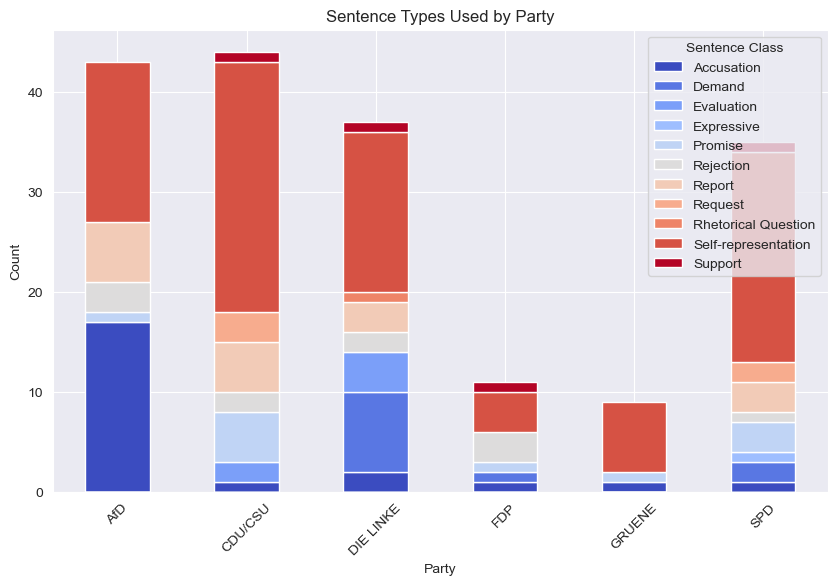

In [369]:
grouped = classified_same_unique_exploded.groupby(['Party', 'Category Sentence Class']).size().unstack()

grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.ylabel("Count")
plt.title("Sentence Types Used by Party")
plt.xticks(rotation=45)
plt.legend(title="Sentence Class")
plt.show()

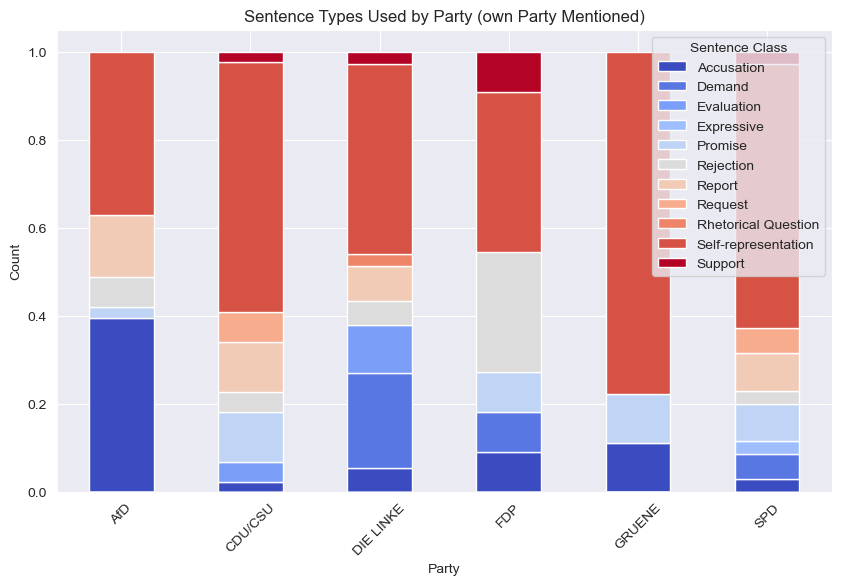

In [370]:
grouped = classified_same_unique_exploded.groupby(['Party', 'Category Sentence Class']).size().unstack()
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)
grouped_normalized.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.ylabel("Count")
plt.title("Sentence Types Used by Party (own Party Mentioned)")
plt.xticks(rotation=45)
plt.legend(title="Sentence Class")
plt.savefig("plots/sentence_types_used_own_party_mentioned.png", dpi=300, bbox_inches="tight")
plt.show()

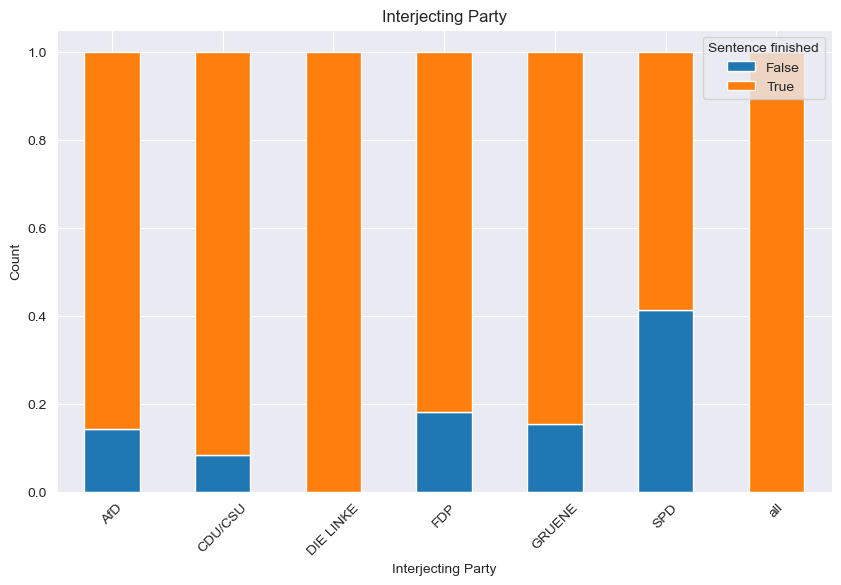

Overall: Sentence finished
True     0.888112
False    0.111888
Name: proportion, dtype: float64


In [371]:
grouped = classified_same_unique[classified_same_unique['Speaker Interjected'] == False]
grouped = grouped.groupby(['Interjecting Party', 'Sentence finished']).size().unstack()
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

grouped_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Interjecting Party")
plt.legend(title='Sentence finished')
plt.savefig("plots/interjecting_party_own_party_mentioned.png", dpi=300, bbox_inches="tight")
plt.show()

sentence_finished_count = classified_same_unique['Sentence finished'].value_counts(normalize=True)
print(f"Overall: {sentence_finished_count}")

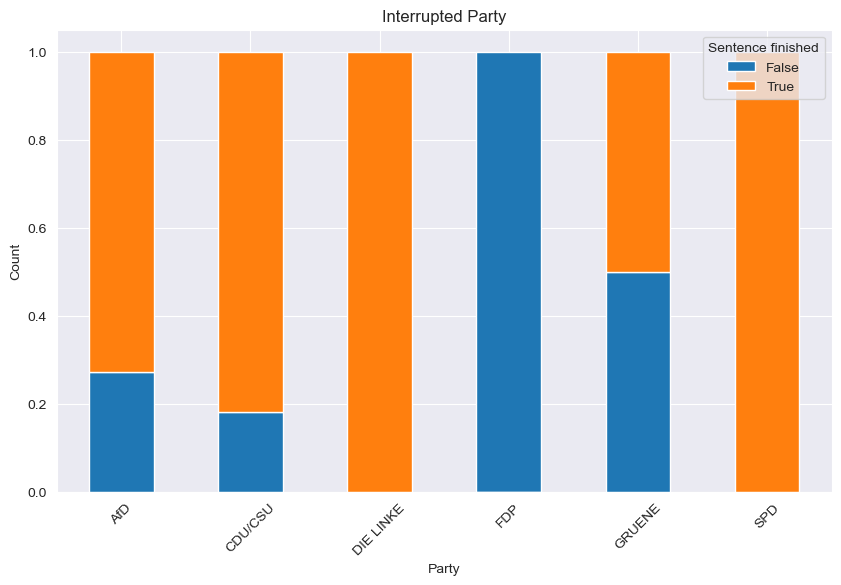

In [372]:
grouped = classified_same_unique[classified_same_unique['Speaker Interjected'] == False]
grouped = grouped.groupby(['Party', 'Sentence finished']).size().unstack()
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

grouped_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Interrupted Party")
plt.legend(title='Sentence finished')
plt.savefig("plots/interrupted_party_own_party_mentioned.png", dpi=300, bbox_inches="tight")
plt.show()

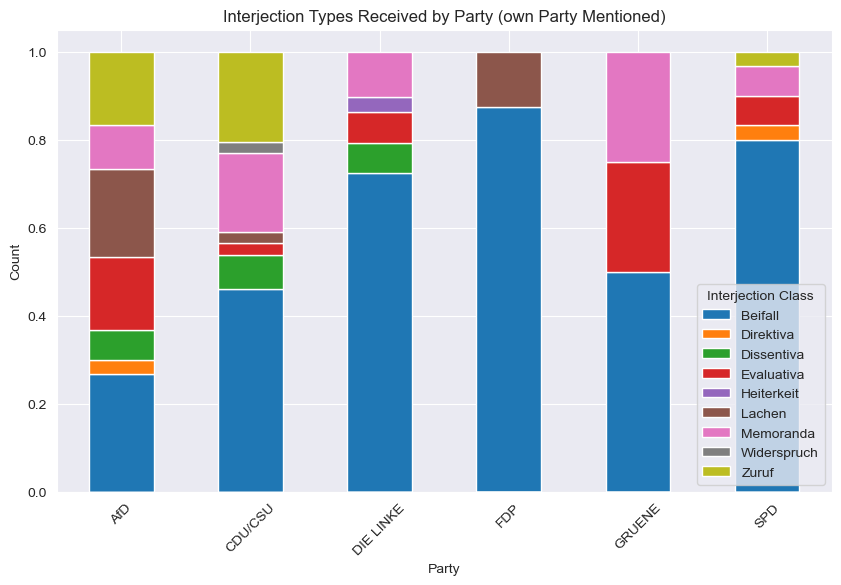

In [373]:
grouped = classified_same_exploded.groupby(['Party', 'Category Interjection Class']).size().unstack()
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

grouped_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel("Count")
plt.title("Interjection Types Received by Party (own Party Mentioned)")
plt.xticks(rotation=45)
plt.legend(title="Interjection Class")
plt.savefig("plots/interjection_types_received_own_party_mentioned.png", dpi=300, bbox_inches="tight")
plt.show()

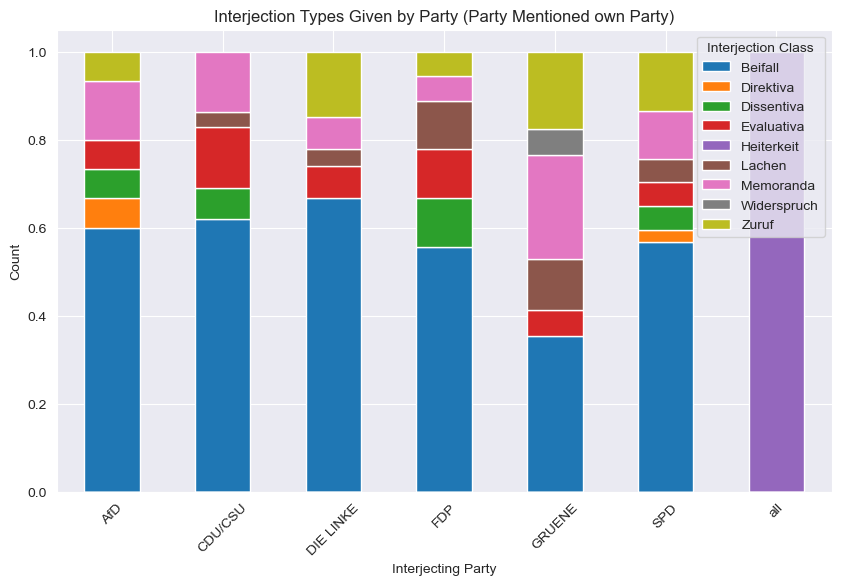

In [374]:
grouped = classified_same_exploded.groupby(['Interjecting Party', 'Category Interjection Class']).size().unstack()
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

grouped_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel("Count")
plt.title("Interjection Types Given by Party (Party Mentioned own Party)")
plt.xticks(rotation=45)
plt.legend(title="Interjection Class")
plt.savefig("plots/interjection_types_given_own_party_mentioned.png", dpi=300, bbox_inches="tight")
plt.show()

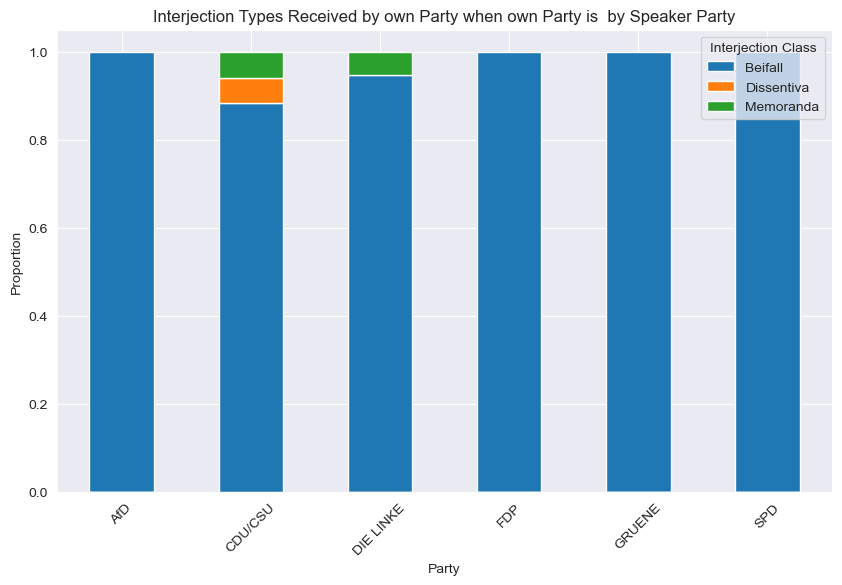

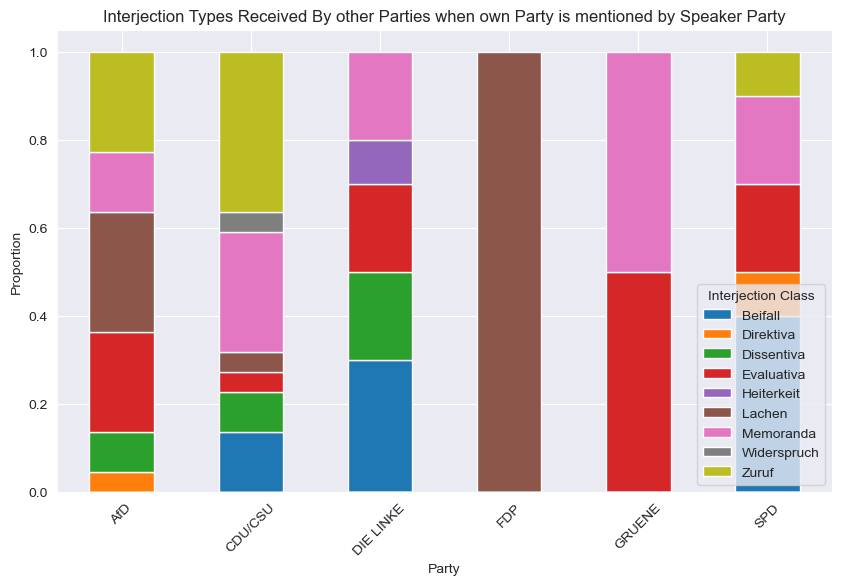

In [375]:
# Filter data for Speaker Interjected == True
grouped_true = classified_same_exploded[classified_same_exploded['Speaker Interjected'] == True]
grouped_true = grouped_true.groupby(['Party', 'Category Interjection Class']).size().unstack()
grouped_true_normalized = grouped_true.div(grouped_true.sum(axis=1), axis=0)

# Plot for Speaker Interjected == True
grouped_true_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel("Proportion")
plt.title("Interjection Types Received by own Party when own Party is  by Speaker Party")
plt.xticks(rotation=45)
plt.legend(title="Interjection Class")
plt.savefig("plots/interjection_types_received_own_party_mentioned_own_interjector.png", dpi=300, bbox_inches="tight")
plt.show()

# Filter data for Speaker Interjected == False
grouped_false = classified_same_exploded[classified_same_exploded['Speaker Interjected'] == False]
grouped_false = grouped_false.groupby(['Party', 'Category Interjection Class']).size().unstack()
grouped_false_normalized = grouped_false.div(grouped_false.sum(axis=1), axis=0)

# Plot for Speaker Interjected == False
grouped_false_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel("Proportion")
plt.title("Interjection Types Received By other Parties when own Party is mentioned by Speaker Party")
plt.xticks(rotation=45)
plt.legend(title="Interjection Class")
plt.savefig("plots/interjection_types_received_own_party_mentioned_other_interjector.png", dpi=300, bbox_inches="tight")
plt.show()


6


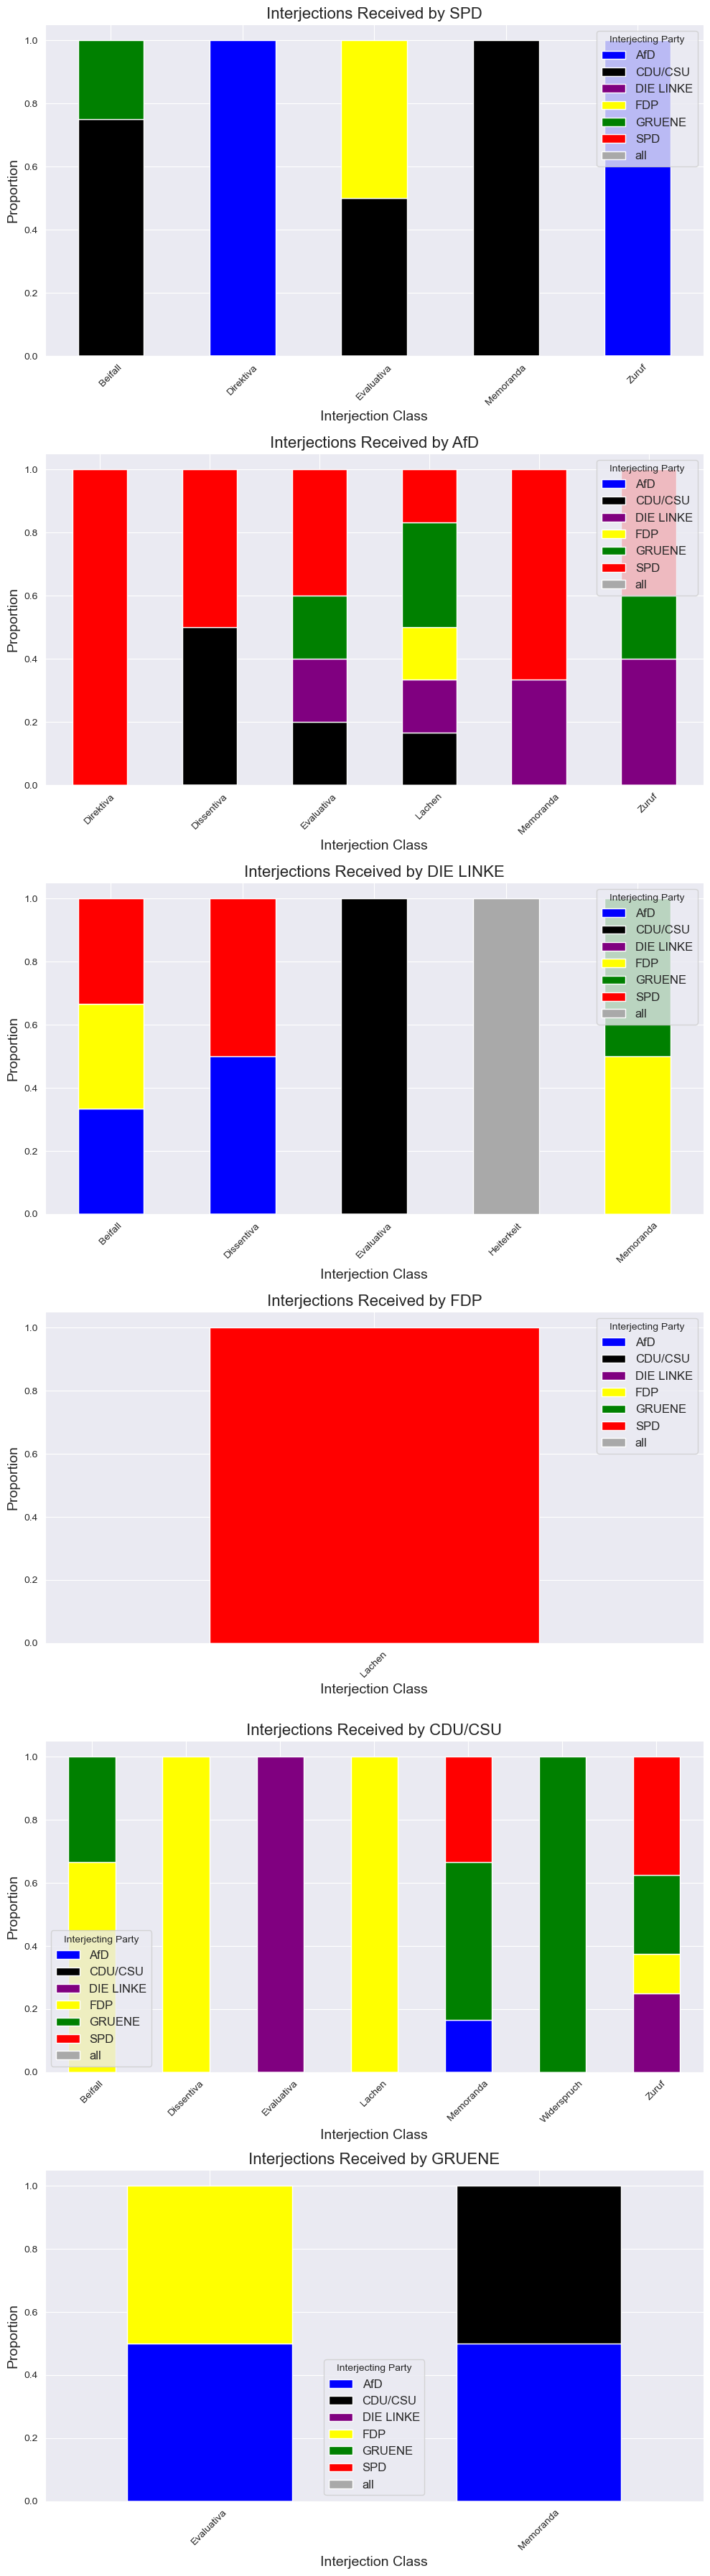

In [376]:
grouped_false = classified_same_exploded[classified_same_exploded['Speaker Interjected'] == False]

grouped_false = grouped_false.groupby(['Party', 'Category Interjection Class', 'Interjecting Party']).size().unstack(fill_value=0)

unique_parties = classified_same_exploded['Party'].unique()

party_colors = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'GRUENE': 'green',
    'AfD': 'blue',
    'FDP': 'yellow',
    'DIE LINKE': 'purple',
    'parteilos': 'grey',
    'Die PARTEI': 'darkred',
    'LKR': 'darkblue',
    'all': 'darkgrey',
    'Unknown': 'lightgrey',
}

num_parties = len(unique_parties)
print(num_parties)

fig, axes = plt.subplots(num_parties, 1, figsize=(10, 6 * num_parties))

if num_parties == 1:
    axes = [axes]

for i, party in enumerate(unique_parties):
    ax = axes[i]

    party_data = grouped_false.loc[party]

    party_data_normalized = party_data.div(party_data.sum(axis=1), axis=0)

    colors = [party_colors.get(party_name, 'grey') for party_name in party_data_normalized.columns]

    party_data_normalized.plot(kind='bar', stacked=True, ax=ax, color=colors)

    ax.set_title(f'Interjections Received by {party}', fontsize=16)
    ax.set_xlabel('Interjection Class', fontsize=14)
    ax.set_ylabel('Proportion', fontsize=14)
    ax.legend(title='Interjecting Party', fontsize=12)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.savefig("plots/interjections_received_own_party_mentioned.png", dpi=300, bbox_inches="tight")
plt.show()


7


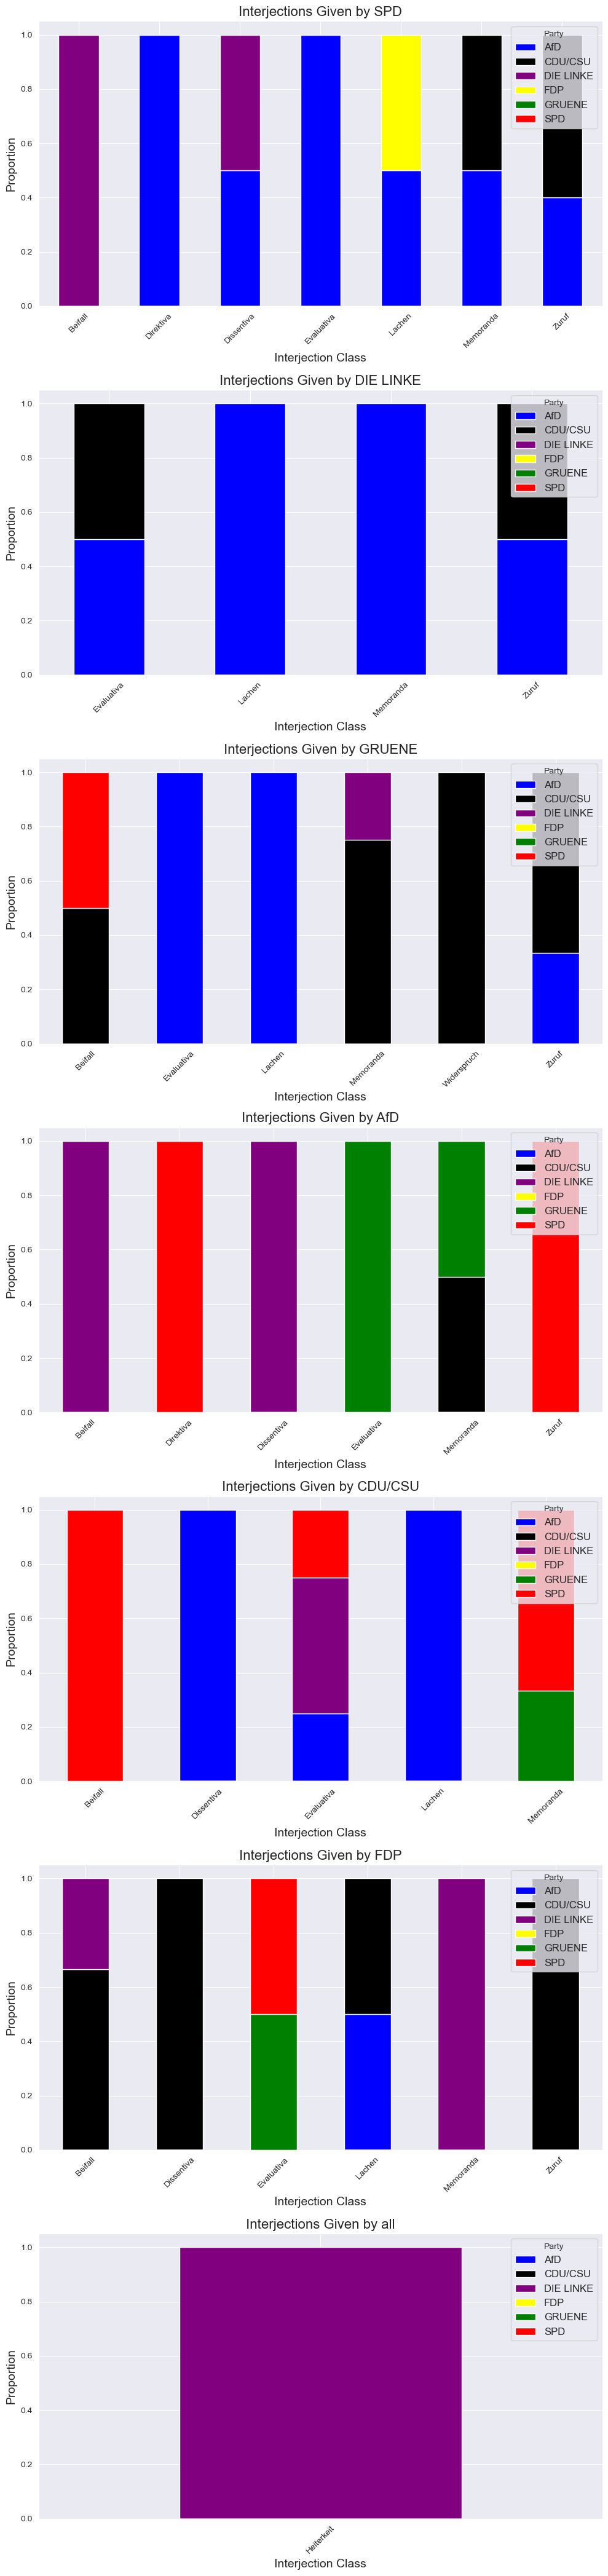

In [377]:
grouped_false = classified_same_exploded[classified_same_exploded['Speaker Interjected'] == False]

grouped_false = grouped_false.groupby(['Interjecting Party', 'Category Interjection Class', 'Party']).size().unstack(fill_value=0)

unique_parties = classified_same_exploded['Interjecting Party'].unique()

party_colors = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'GRUENE': 'green',
    'AfD': 'blue',
    'FDP': 'yellow',
    'DIE LINKE': 'purple',
    'parteilos': 'grey',
    'Die PARTEI': 'darkred',
    'LKR': 'darkblue',
    'all': 'darkgrey',
    'Unknown': 'lightgrey',
}

num_parties = len(unique_parties)
print(num_parties)

fig, axes = plt.subplots(num_parties, 1, figsize=(10, 6 * num_parties))

if num_parties == 1:
    axes = [axes]

for i, party in enumerate(unique_parties):
    ax = axes[i]

    party_data = grouped_false.loc[party]

    party_data_normalized = party_data.div(party_data.sum(axis=1), axis=0)

    colors = [party_colors.get(party_name, 'grey') for party_name in party_data_normalized.columns]

    party_data_normalized.plot(kind='bar', stacked=True, ax=ax, color=colors)

    ax.set_title(f'Interjections Given by {party}', fontsize=16)
    ax.set_xlabel('Interjection Class', fontsize=14)
    ax.set_ylabel('Proportion', fontsize=14)
    ax.legend(title='Party', fontsize=12)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.savefig("plots/interjections_given_own_party_mentioned.png", dpi=300, bbox_inches="tight")
plt.show()


In [378]:
classified_other

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,Sentences,Mentioned parties,Interjection Type,Interjecting Party,Interjecting Person,Interjection Content,Specific Class,Sentence Class (Reinig),Interjection Class (Burkhardt),Sentence finished
0,BT_19_235.xml,19,23.06.2021,FragestundeDrucksache 19/30797Dr. Anton Friese...,32558,2,Renate Künast,mp,weiblich,GRUENE,Rechtsextremismus und die Verbreitung von Hass...,AfD,Verbal,AfD,Dr. Götz Frömming,Unsinn!,Zuruf,Accusation,Evaluativa,True
1,BT_19_235.xml,19,23.06.2021,FragestundeDrucksache 19/30797Dr. Anton Friese...,32558,2,Renate Künast,mp,weiblich,GRUENE,Rechtsextremismus und die Verbreitung von Hass...,AfD,Verbal,AfD,Dr. Rainer Kraft,Unverschämte Behauptung!,Zuruf,Accusation,Evaluativa,True
2,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,11,Udo Theodor Hemmelgarn,mp,männlich,AfD,Dass es Die Linke mit der sozialen Marktwirtsc...,DIE LINKE,Verbal,DIE LINKE,Niema Movassat,Sehr guter Entwurf!,Zuruf,Accusation,Memoranda,True
3,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,12,Udo Theodor Hemmelgarn,mp,männlich,AfD,"Die Linken möchten, dass jeder einen einklagba...",DIE LINKE,Verbal,DIE LINKE,Niema Movassat,"Da kippt die AfD um, wenn sie das hört!",Zuruf,Report,Memoranda,True
4,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,18,Udo Theodor Hemmelgarn,mp,männlich,AfD,"Zu all dem haben Sie, die Linken, Beifall gekl...",DIE LINKE,Verbal,DIE LINKE,Niema Movassat,Haben Sie eigentlich eine andere Antwort außer...,Zuruf,Report,Memoranda,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,6,Paul Ziemiak,mp,männlich,CDU/CSU,– Zur SPD komme ich gleich.,SPD,Verbal,SPD,Yasmin Fahimi,Sehr gerne!,Zuruf,Report,Affirmativa,True
83,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,26,Paul Ziemiak,mp,männlich,CDU/CSU,"Das ist erfolgreiche Regierungspolitik, und ni...",SPD,Verbal,SPD,Unknown,NaN,Zuruf,"Accusation, Self-Representation",NaN,True
84,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,26,Paul Ziemiak,mp,männlich,CDU/CSU,"Das ist erfolgreiche Regierungspolitik, und ni...",GRUENE,Verbal,GRUENE,Unknown,NaN,Zuruf,"Accusation, Self-Representation",NaN,True
85,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,41,Paul Ziemiak,mp,männlich,CDU/CSU,Aber es geht doch nicht darum – wie es die SPD...,SPD,Verbal,SPD,Yasmin Fahimi,Richtig! Dann bremsen Sie dabei auch nicht stä...,Zuruf,"Accusation, Request","Affirmativa, Memoranda",True


In [379]:
classified_other.loc[:, 'Party'] = classified_other['Party'].astype(str)
classified_other.loc[:, 'Sentence Class (Reinig)'] = classified_other['Sentence Class (Reinig)'].astype(str)
#classified_other.loc[:, 'Sentence finished'] = classified_other['Sentence finished ']
classified_other['Sentence Class (Reinig)'] = classified_other['Sentence Class (Reinig)'].str.strip()
classified_other['Interjection Class (Burkhardt)'] = classified_other['Interjection Class (Burkhardt)'].str.strip()
#classified_other = classified_other.drop('Sentence finished ', axis=1)

In [380]:
classified_other_unique = classified_other.drop(columns=[
    'Interjection Type', 'Interjecting Person',
    'Interjection Content', 'Specific Class', 'Interjection Class (Burkhardt)'
]).copy()

classified_other_unique = classified_other_unique.drop_duplicates()
classified_other_unique['Category Sentence Class'] = classified_other_unique['Sentence Class (Reinig)'].apply(categorize_sentence)
classified_other_unique_exploded = classified_other_unique.explode('Category Sentence Class', ignore_index=True)

classified_other_unique_exploded

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,Sentences,Mentioned parties,Interjecting Party,Sentence Class (Reinig),Sentence finished,Category Sentence Class
0,BT_19_235.xml,19,23.06.2021,FragestundeDrucksache 19/30797Dr. Anton Friese...,32558,2,Renate Künast,mp,weiblich,GRUENE,Rechtsextremismus und die Verbreitung von Hass...,AfD,AfD,Accusation,True,Accusation
1,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,11,Udo Theodor Hemmelgarn,mp,männlich,AfD,Dass es Die Linke mit der sozialen Marktwirtsc...,DIE LINKE,DIE LINKE,Accusation,True,Accusation
2,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,12,Udo Theodor Hemmelgarn,mp,männlich,AfD,"Die Linken möchten, dass jeder einen einklagba...",DIE LINKE,DIE LINKE,Report,True,Report
3,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,18,Udo Theodor Hemmelgarn,mp,männlich,AfD,"Zu all dem haben Sie, die Linken, Beifall gekl...",DIE LINKE,DIE LINKE,Report,True,Report
4,BT_19_235.xml,19,23.06.2021,Beschlussempfehlung und Bericht des 2. Untersu...,32612,25,Ulrich Lange,mp,männlich,CDU/CSU,"– Ja, das ist den Applaus wert, nicht nur den ...",SPD,SPD,Request,True,Request
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,26,Paul Ziemiak,mp,männlich,CDU/CSU,"Das ist erfolgreiche Regierungspolitik, und ni...",GRUENE,GRUENE,"Accusation, Self-Representation",True,Accusation
95,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,26,Paul Ziemiak,mp,männlich,CDU/CSU,"Das ist erfolgreiche Regierungspolitik, und ni...",GRUENE,GRUENE,"Accusation, Self-Representation",True,Self-representation
96,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,41,Paul Ziemiak,mp,männlich,CDU/CSU,Aber es geht doch nicht darum – wie es die SPD...,SPD,SPD,"Accusation, Request",True,Accusation
97,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,41,Paul Ziemiak,mp,männlich,CDU/CSU,Aber es geht doch nicht darum – wie es die SPD...,SPD,SPD,"Accusation, Request",True,Request


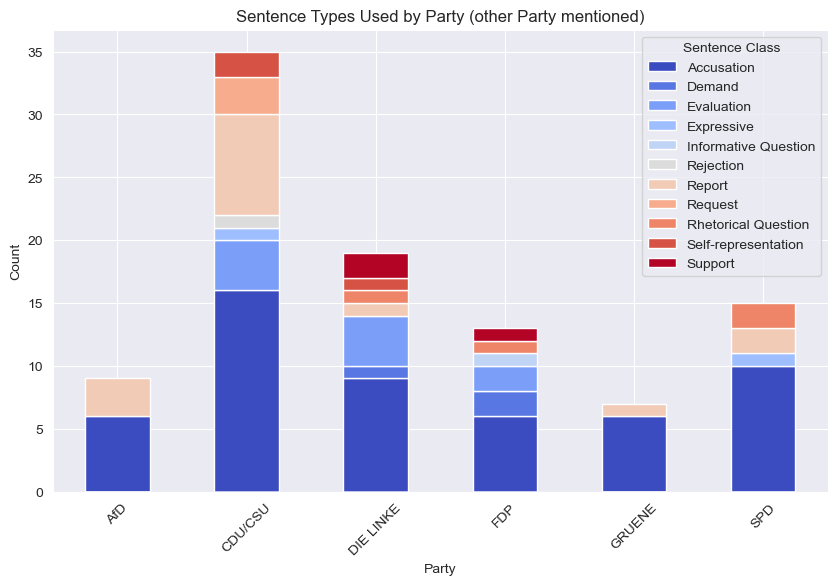

In [381]:
grouped = classified_other_unique_exploded.groupby(['Party', 'Category Sentence Class']).size().unstack()
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.ylabel("Count")
plt.title("Sentence Types Used by Party (other Party mentioned)")
plt.xticks(rotation=45)
plt.legend(title="Sentence Class")
plt.show()

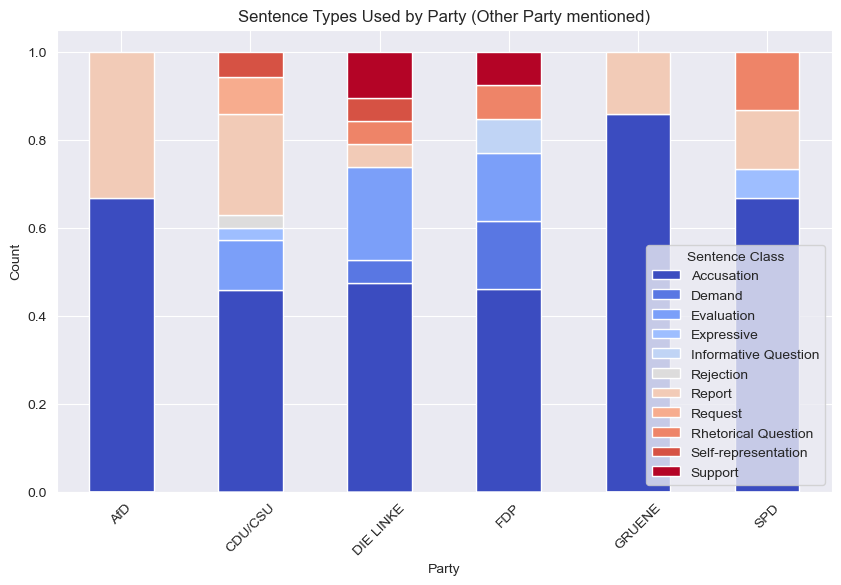

In [382]:
grouped = classified_other_unique_exploded.groupby(['Party', 'Category Sentence Class']).size().unstack()
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)
grouped_normalized.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.ylabel("Count")
plt.title("Sentence Types Used by Party (Other Party mentioned)")
plt.xticks(rotation=45)
plt.legend(title="Sentence Class")
plt.savefig("plots/sentence_types_used_other_party_mentioned.png", dpi=300, bbox_inches="tight")
plt.show()

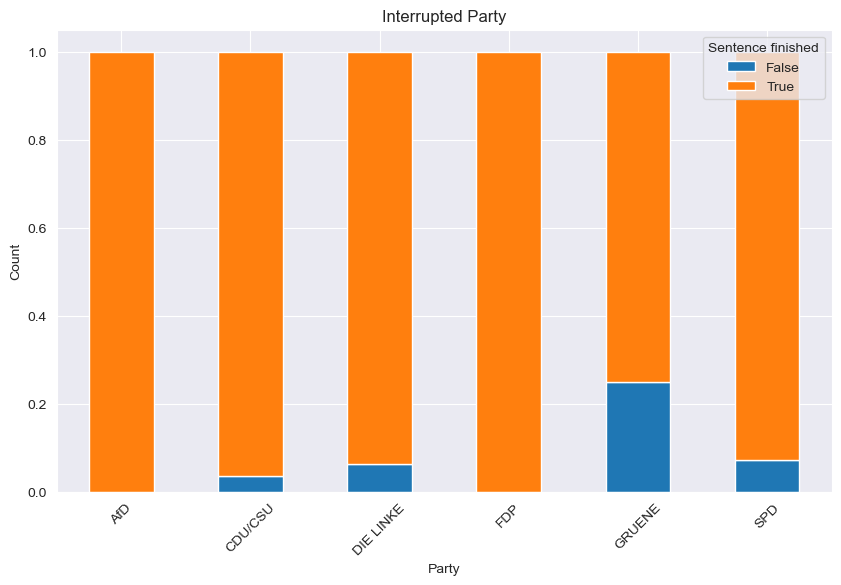

In [383]:
grouped = classified_other_unique.groupby(['Party', 'Sentence finished']).size().unstack()
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

grouped_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Sentence finished')
plt.title("Interrupted Party")
plt.savefig("plots/interrupted_party_other_party_mentioned.png", dpi=300, bbox_inches="tight")
plt.show()

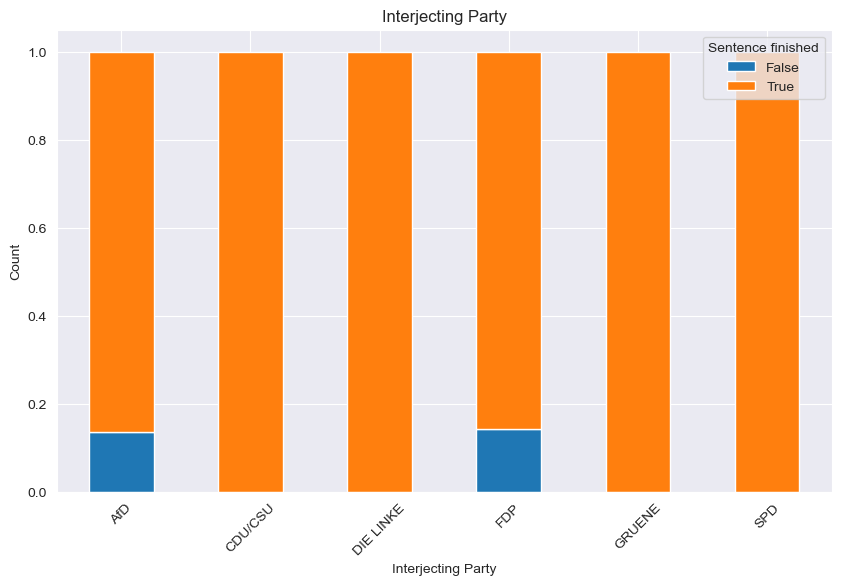

Overall: Sentence finished
True     0.940476
False    0.059524
Name: proportion, dtype: float64


In [384]:
grouped = classified_other_unique.groupby(['Interjecting Party', 'Sentence finished']).size().unstack()
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

grouped_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Interjecting Party")
plt.legend(title='Sentence finished')
plt.savefig("plots/interjecting_party_other_party_mentioned.png", dpi=300, bbox_inches="tight")
plt.show()

sentence_finished_count = classified_other_unique['Sentence finished'].value_counts(normalize=True)
print(f"Overall: {sentence_finished_count}")

In [385]:
def replace_empty_list(row):
    return row['Specific Class'] if not row['Category Interjection Class'] else row['Category Interjection Class']

In [386]:
classified_other['Interjection Class (Burkhardt)'] = classified_other['Interjection Class (Burkhardt)'].fillna(classified_other['Specific Class'])
classified_other['Category Interjection Class'] = classified_other['Interjection Class (Burkhardt)'].apply(categorize_interjection)

classified_other['Category Interjection Class'] = classified_other.apply(
    lambda row: row['Specific Class'] if isinstance(row['Category Interjection Class'], list) and not row['Category Interjection Class'] else row['Category Interjection Class'],
    axis=1
)

classified_other_exploded = classified_other.explode('Category Interjection Class', ignore_index=True)
classified_other_exploded

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,Mentioned parties,Interjection Type,Interjecting Party,Interjecting Person,Interjection Content,Specific Class,Sentence Class (Reinig),Interjection Class (Burkhardt),Sentence finished,Category Interjection Class
0,BT_19_235.xml,19,23.06.2021,FragestundeDrucksache 19/30797Dr. Anton Friese...,32558,2,Renate Künast,mp,weiblich,GRUENE,...,AfD,Verbal,AfD,Dr. Götz Frömming,Unsinn!,Zuruf,Accusation,Evaluativa,True,Evaluativa
1,BT_19_235.xml,19,23.06.2021,FragestundeDrucksache 19/30797Dr. Anton Friese...,32558,2,Renate Künast,mp,weiblich,GRUENE,...,AfD,Verbal,AfD,Dr. Rainer Kraft,Unverschämte Behauptung!,Zuruf,Accusation,Evaluativa,True,Evaluativa
2,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,11,Udo Theodor Hemmelgarn,mp,männlich,AfD,...,DIE LINKE,Verbal,DIE LINKE,Niema Movassat,Sehr guter Entwurf!,Zuruf,Accusation,Memoranda,True,Memoranda
3,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,12,Udo Theodor Hemmelgarn,mp,männlich,AfD,...,DIE LINKE,Verbal,DIE LINKE,Niema Movassat,"Da kippt die AfD um, wenn sie das hört!",Zuruf,Report,Memoranda,True,Memoranda
4,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,18,Udo Theodor Hemmelgarn,mp,männlich,AfD,...,DIE LINKE,Verbal,DIE LINKE,Niema Movassat,Haben Sie eigentlich eine andere Antwort außer...,Zuruf,Report,Memoranda,True,Memoranda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,26,Paul Ziemiak,mp,männlich,CDU/CSU,...,SPD,Verbal,SPD,Unknown,NaN,Zuruf,"Accusation, Self-Representation",Zuruf,True,Zuruf
86,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,26,Paul Ziemiak,mp,männlich,CDU/CSU,...,GRUENE,Verbal,GRUENE,Unknown,NaN,Zuruf,"Accusation, Self-Representation",Zuruf,True,Zuruf
87,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,41,Paul Ziemiak,mp,männlich,CDU/CSU,...,SPD,Verbal,SPD,Yasmin Fahimi,Richtig! Dann bremsen Sie dabei auch nicht stä...,Zuruf,"Accusation, Request","Affirmativa, Memoranda",True,Affirmativa
88,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,41,Paul Ziemiak,mp,männlich,CDU/CSU,...,SPD,Verbal,SPD,Yasmin Fahimi,Richtig! Dann bremsen Sie dabei auch nicht stä...,Zuruf,"Accusation, Request","Affirmativa, Memoranda",True,Memoranda


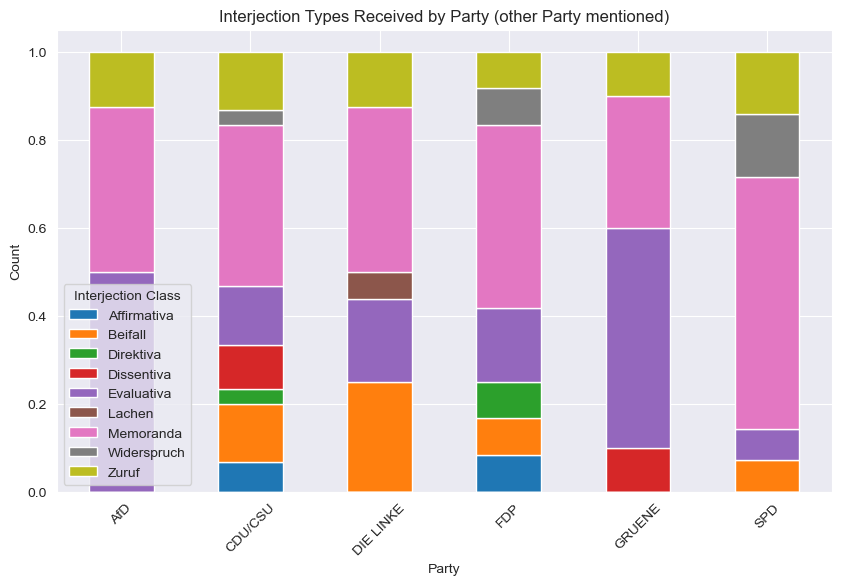

In [387]:
grouped = classified_other_exploded.groupby(['Party', 'Category Interjection Class']).size().unstack()
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

grouped_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel("Count")
plt.title("Interjection Types Received by Party (other Party mentioned)")
plt.xticks(rotation=45)
plt.legend(title="Interjection Class")
plt.savefig("plots/interjection_types_received_other_party_mentioned.png", dpi=300, bbox_inches="tight")
plt.show()

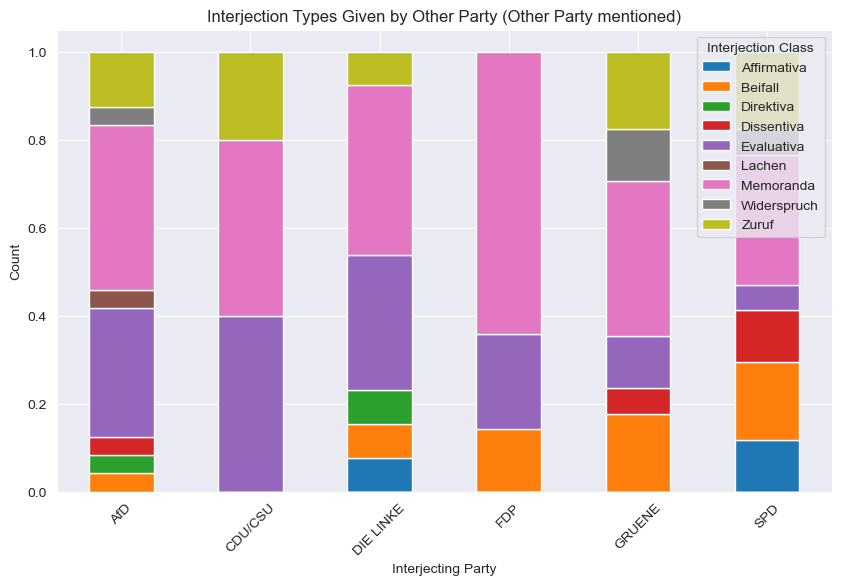

In [388]:
grouped = classified_other_exploded.groupby(['Interjecting Party', 'Category Interjection Class']).size().unstack()
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

grouped_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel("Count")
plt.title("Interjection Types Given by Other Party (Other Party mentioned)")
plt.xticks(rotation=45)
plt.legend(title="Interjection Class")
plt.savefig("plots/interjection_types_given_other_party_mentioned.png", dpi=300, bbox_inches="tight")
plt.show()

In [389]:
classified_other

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,Mentioned parties,Interjection Type,Interjecting Party,Interjecting Person,Interjection Content,Specific Class,Sentence Class (Reinig),Interjection Class (Burkhardt),Sentence finished,Category Interjection Class
0,BT_19_235.xml,19,23.06.2021,FragestundeDrucksache 19/30797Dr. Anton Friese...,32558,2,Renate Künast,mp,weiblich,GRUENE,...,AfD,Verbal,AfD,Dr. Götz Frömming,Unsinn!,Zuruf,Accusation,Evaluativa,True,[Evaluativa]
1,BT_19_235.xml,19,23.06.2021,FragestundeDrucksache 19/30797Dr. Anton Friese...,32558,2,Renate Künast,mp,weiblich,GRUENE,...,AfD,Verbal,AfD,Dr. Rainer Kraft,Unverschämte Behauptung!,Zuruf,Accusation,Evaluativa,True,[Evaluativa]
2,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,11,Udo Theodor Hemmelgarn,mp,männlich,AfD,...,DIE LINKE,Verbal,DIE LINKE,Niema Movassat,Sehr guter Entwurf!,Zuruf,Accusation,Memoranda,True,[Memoranda]
3,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,12,Udo Theodor Hemmelgarn,mp,männlich,AfD,...,DIE LINKE,Verbal,DIE LINKE,Niema Movassat,"Da kippt die AfD um, wenn sie das hört!",Zuruf,Report,Memoranda,True,[Memoranda]
4,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,18,Udo Theodor Hemmelgarn,mp,männlich,AfD,...,DIE LINKE,Verbal,DIE LINKE,Niema Movassat,Haben Sie eigentlich eine andere Antwort außer...,Zuruf,Report,Memoranda,True,[Memoranda]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,6,Paul Ziemiak,mp,männlich,CDU/CSU,...,SPD,Verbal,SPD,Yasmin Fahimi,Sehr gerne!,Zuruf,Report,Affirmativa,True,[Affirmativa]
83,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,26,Paul Ziemiak,mp,männlich,CDU/CSU,...,SPD,Verbal,SPD,Unknown,NaN,Zuruf,"Accusation, Self-Representation",Zuruf,True,Zuruf
84,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,26,Paul Ziemiak,mp,männlich,CDU/CSU,...,GRUENE,Verbal,GRUENE,Unknown,NaN,Zuruf,"Accusation, Self-Representation",Zuruf,True,Zuruf
85,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,41,Paul Ziemiak,mp,männlich,CDU/CSU,...,SPD,Verbal,SPD,Yasmin Fahimi,Richtig! Dann bremsen Sie dabei auch nicht stä...,Zuruf,"Accusation, Request","Affirmativa, Memoranda",True,"[Affirmativa, Memoranda]"


6


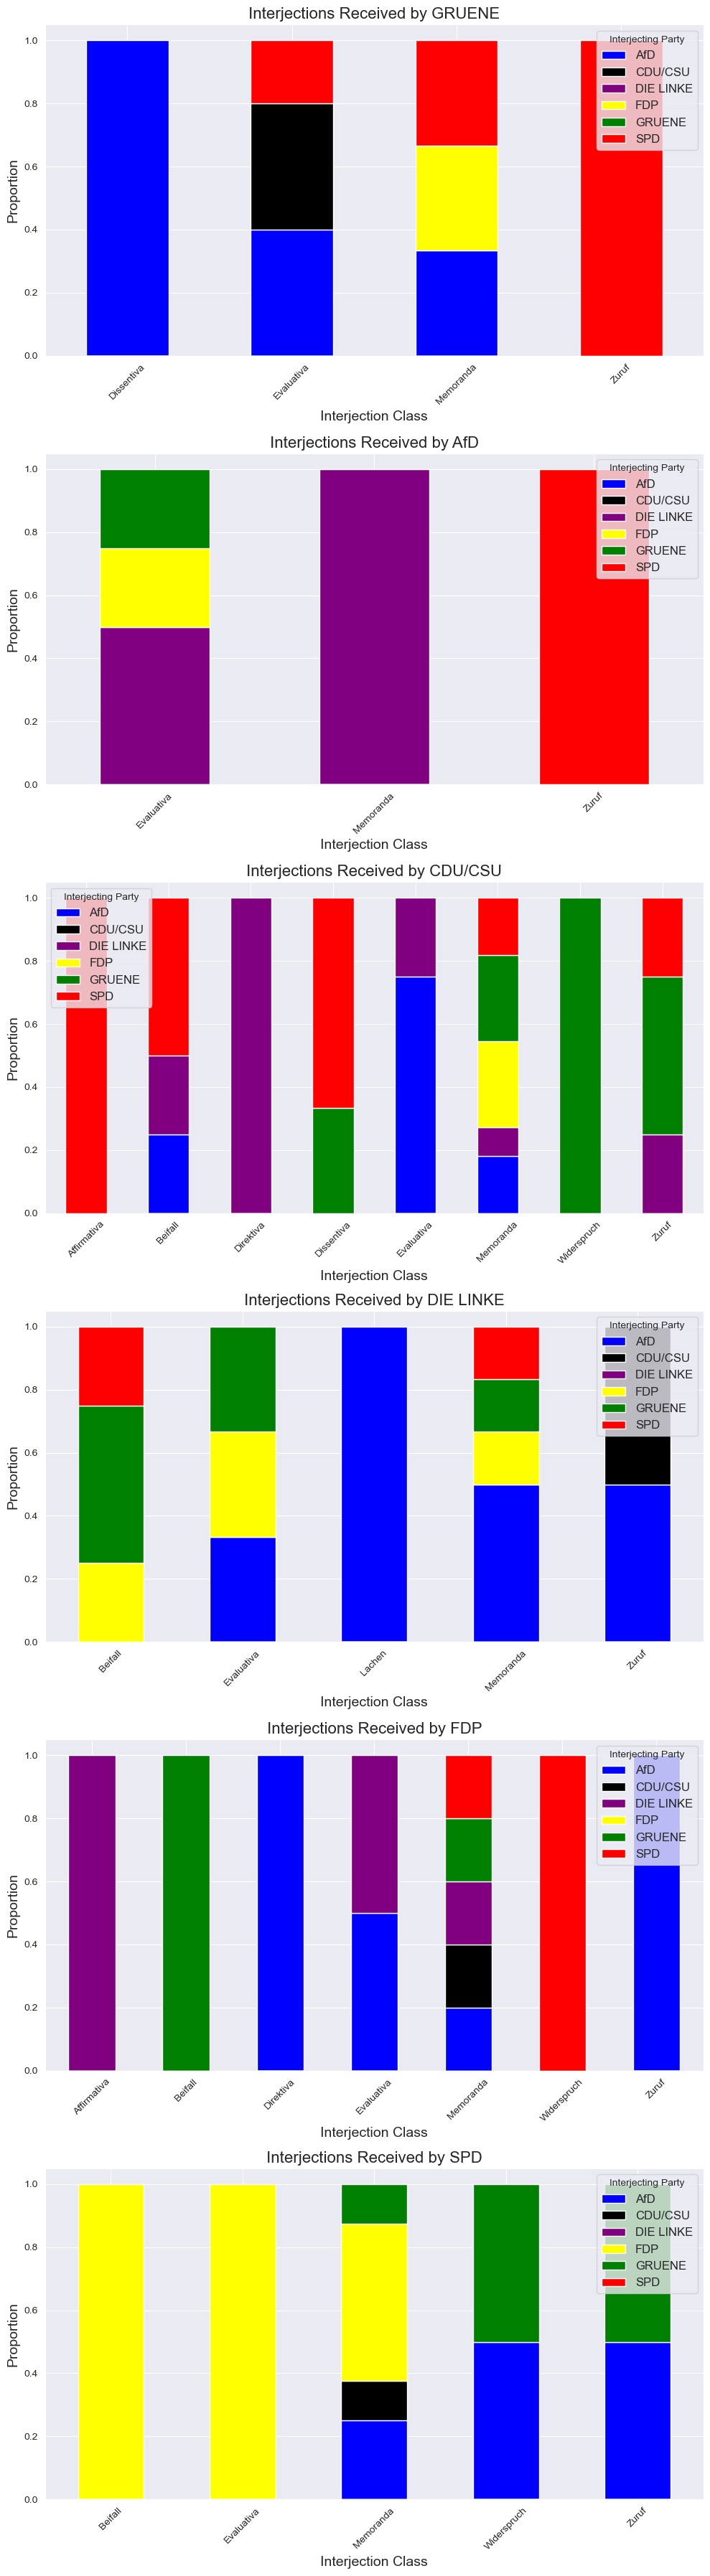

In [390]:
grouped = classified_other_exploded.groupby(['Party', 'Category Interjection Class', 'Interjecting Party']).size().unstack(fill_value=0)

unique_parties = classified_other_exploded['Party'].unique()

num_parties = len(unique_parties)
print(num_parties)

fig, axes = plt.subplots(num_parties, 1, figsize=(10, 6 * num_parties))

if num_parties == 1:
    axes = [axes]

for i, party in enumerate(unique_parties):
    ax = axes[i]

    party_data = grouped.loc[party]

    party_data_normalized = party_data.div(party_data.sum(axis=1), axis=0)

    colors = [party_colors.get(party_name, 'grey') for party_name in party_data_normalized.columns]

    party_data_normalized.plot(kind='bar', stacked=True, ax=ax, color=colors)

    ax.set_title(f'Interjections Received by {party}', fontsize=16)
    ax.set_xlabel('Interjection Class', fontsize=14)
    ax.set_ylabel('Proportion', fontsize=14)
    ax.legend(title='Interjecting Party', fontsize=12)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.savefig("plots/interjections_received_other_party_mentioned.png", dpi=300, bbox_inches="tight")
plt.show()

6


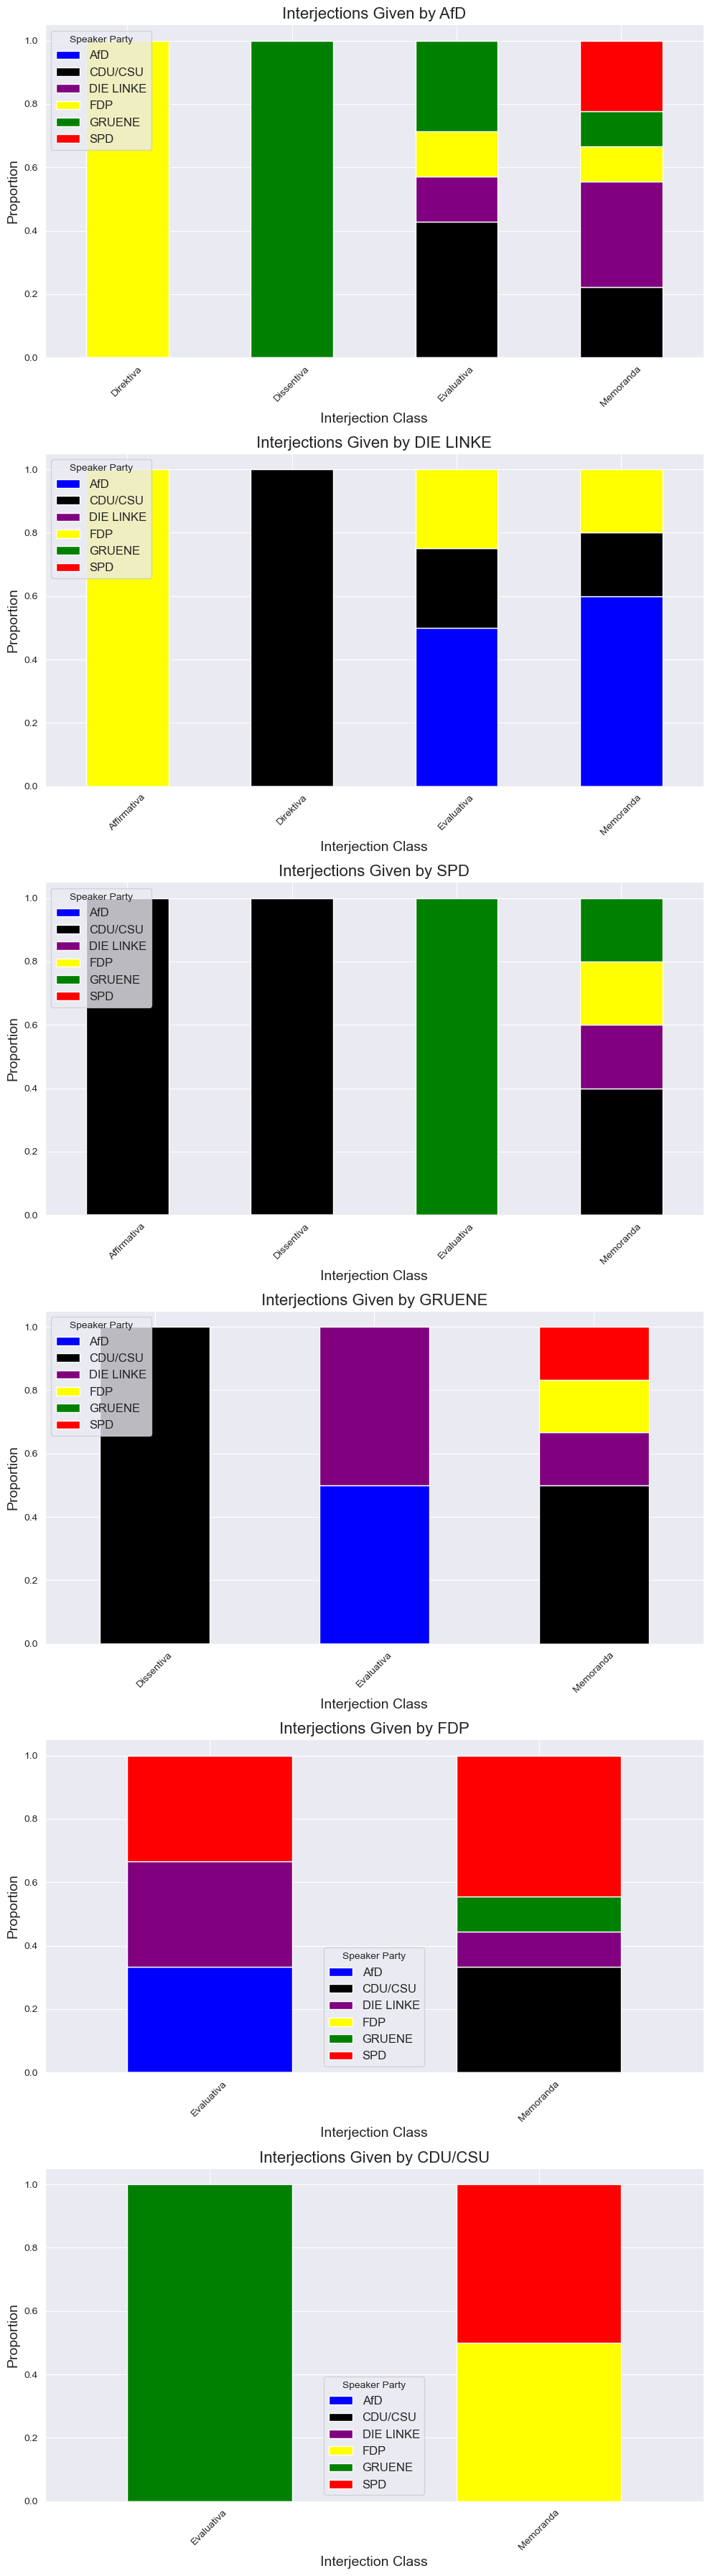

In [391]:
classified_other['Category Interjection Class'] = classified_other['Interjection Class (Burkhardt)'].apply(categorize_interjection)

classified_other['Category Interjection Class'] = classified_other['Category Interjection Class'].fillna(classified_other['Specific Class'])

classified_other_exploded = classified_other.explode('Category Interjection Class', ignore_index=True)

grouped = classified_other_exploded.groupby(['Interjecting Party', 'Category Interjection Class', 'Party']).size().unstack(fill_value=0)

unique_parties = classified_other_exploded['Interjecting Party'].unique()

num_parties = len(unique_parties)
print(num_parties)

fig, axes = plt.subplots(num_parties, 1, figsize=(10, 6 * num_parties))

if num_parties == 1:
    axes = [axes]

for i, party in enumerate(unique_parties):
    ax = axes[i]

    party_data = grouped.loc[party]

    party_data_normalized = party_data.div(party_data.sum(axis=1), axis=0)

    colors = [party_colors.get(party_name, 'grey') for party_name in party_data_normalized.columns]

    party_data_normalized.plot(kind='bar', stacked=True, ax=ax, color=colors)

    ax.set_title(f'Interjections Given by {party}', fontsize=16)
    ax.set_xlabel('Interjection Class', fontsize=14)
    ax.set_ylabel('Proportion', fontsize=14)
    ax.legend(title='Speaker Party', fontsize=12)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.savefig("plots/interjections_given_other_party_mentioned.png", dpi=300, bbox_inches="tight")
# Show the plot
plt.show()


In [392]:
classified_other_exploded

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,Mentioned parties,Interjection Type,Interjecting Party,Interjecting Person,Interjection Content,Specific Class,Sentence Class (Reinig),Interjection Class (Burkhardt),Sentence finished,Category Interjection Class
0,BT_19_235.xml,19,23.06.2021,FragestundeDrucksache 19/30797Dr. Anton Friese...,32558,2,Renate Künast,mp,weiblich,GRUENE,...,AfD,Verbal,AfD,Dr. Götz Frömming,Unsinn!,Zuruf,Accusation,Evaluativa,True,Evaluativa
1,BT_19_235.xml,19,23.06.2021,FragestundeDrucksache 19/30797Dr. Anton Friese...,32558,2,Renate Künast,mp,weiblich,GRUENE,...,AfD,Verbal,AfD,Dr. Rainer Kraft,Unverschämte Behauptung!,Zuruf,Accusation,Evaluativa,True,Evaluativa
2,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,11,Udo Theodor Hemmelgarn,mp,männlich,AfD,...,DIE LINKE,Verbal,DIE LINKE,Niema Movassat,Sehr guter Entwurf!,Zuruf,Accusation,Memoranda,True,Memoranda
3,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,12,Udo Theodor Hemmelgarn,mp,männlich,AfD,...,DIE LINKE,Verbal,DIE LINKE,Niema Movassat,"Da kippt die AfD um, wenn sie das hört!",Zuruf,Report,Memoranda,True,Memoranda
4,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,18,Udo Theodor Hemmelgarn,mp,männlich,AfD,...,DIE LINKE,Verbal,DIE LINKE,Niema Movassat,Haben Sie eigentlich eine andere Antwort außer...,Zuruf,Report,Memoranda,True,Memoranda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,26,Paul Ziemiak,mp,männlich,CDU/CSU,...,SPD,Verbal,SPD,Unknown,NaN,Zuruf,"Accusation, Self-Representation",Zuruf,True,NaN
86,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,26,Paul Ziemiak,mp,männlich,CDU/CSU,...,GRUENE,Verbal,GRUENE,Unknown,NaN,Zuruf,"Accusation, Self-Representation",Zuruf,True,NaN
87,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,41,Paul Ziemiak,mp,männlich,CDU/CSU,...,SPD,Verbal,SPD,Yasmin Fahimi,Richtig! Dann bremsen Sie dabei auch nicht stä...,Zuruf,"Accusation, Request","Affirmativa, Memoranda",True,Affirmativa
88,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,41,Paul Ziemiak,mp,männlich,CDU/CSU,...,SPD,Verbal,SPD,Yasmin Fahimi,Richtig! Dann bremsen Sie dabei auch nicht stä...,Zuruf,"Accusation, Request","Affirmativa, Memoranda",True,Memoranda


In [393]:
classified_other_exploded

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,Mentioned parties,Interjection Type,Interjecting Party,Interjecting Person,Interjection Content,Specific Class,Sentence Class (Reinig),Interjection Class (Burkhardt),Sentence finished,Category Interjection Class
0,BT_19_235.xml,19,23.06.2021,FragestundeDrucksache 19/30797Dr. Anton Friese...,32558,2,Renate Künast,mp,weiblich,GRUENE,...,AfD,Verbal,AfD,Dr. Götz Frömming,Unsinn!,Zuruf,Accusation,Evaluativa,True,Evaluativa
1,BT_19_235.xml,19,23.06.2021,FragestundeDrucksache 19/30797Dr. Anton Friese...,32558,2,Renate Künast,mp,weiblich,GRUENE,...,AfD,Verbal,AfD,Dr. Rainer Kraft,Unverschämte Behauptung!,Zuruf,Accusation,Evaluativa,True,Evaluativa
2,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,11,Udo Theodor Hemmelgarn,mp,männlich,AfD,...,DIE LINKE,Verbal,DIE LINKE,Niema Movassat,Sehr guter Entwurf!,Zuruf,Accusation,Memoranda,True,Memoranda
3,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,12,Udo Theodor Hemmelgarn,mp,männlich,AfD,...,DIE LINKE,Verbal,DIE LINKE,Niema Movassat,"Da kippt die AfD um, wenn sie das hört!",Zuruf,Report,Memoranda,True,Memoranda
4,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,18,Udo Theodor Hemmelgarn,mp,männlich,AfD,...,DIE LINKE,Verbal,DIE LINKE,Niema Movassat,Haben Sie eigentlich eine andere Antwort außer...,Zuruf,Report,Memoranda,True,Memoranda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,26,Paul Ziemiak,mp,männlich,CDU/CSU,...,SPD,Verbal,SPD,Unknown,NaN,Zuruf,"Accusation, Self-Representation",Zuruf,True,NaN
86,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,26,Paul Ziemiak,mp,männlich,CDU/CSU,...,GRUENE,Verbal,GRUENE,Unknown,NaN,Zuruf,"Accusation, Self-Representation",Zuruf,True,NaN
87,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,41,Paul Ziemiak,mp,männlich,CDU/CSU,...,SPD,Verbal,SPD,Yasmin Fahimi,Richtig! Dann bremsen Sie dabei auch nicht stä...,Zuruf,"Accusation, Request","Affirmativa, Memoranda",True,Affirmativa
88,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,41,Paul Ziemiak,mp,männlich,CDU/CSU,...,SPD,Verbal,SPD,Yasmin Fahimi,Richtig! Dann bremsen Sie dabei auch nicht stä...,Zuruf,"Accusation, Request","Affirmativa, Memoranda",True,Memoranda


In [394]:
classified_same

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,Interjection Type,Interjecting Party,Interjecting Person,Interjection Content,Specific Class,Sentence Class (Reinig),Interjection Class (Burkhardt),Sentence finished,Speaker Interjected,Category Interjection Class
0,BT_19_235.xml,19,23.06.2021,Befragung der Bundesregierung,32527,4,Katja Mast,mp,weiblich,SPD,...,Nonverbal,SPD,all,NaN,Beifall,Rejection,Beifall,True,True,Beifall
1,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,14,Nicole Höchst,mp,weiblich,AfD,...,Verbal,SPD,Marianne Schieder,Alternative für Deutschland? Schrecken für Deu...,Zuruf,Accusation,Evaluativa,False,False,Evaluativa
2,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,14,Nicole Höchst,mp,weiblich,AfD,...,Verbal,SPD,Dr. Karamba Diaby,Reden Sie zum Thema! Was hat denn das mit dem ...,Zuruf,Accusation,Memoranda,False,False,Memoranda
3,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,18,Nicole Höchst,mp,weiblich,AfD,...,Verbal,DIE LINKE,Nicole Gohlke,NaN,Zuruf,"Accusation, Report",Zuruf,True,False,Zuruf
4,BT_19_235.xml,19,23.06.2021,Beratung der Unterrichtung der Enquete-Kommiss...,32580,18,Nicole Höchst,mp,weiblich,AfD,...,Verbal,GRUENE,Ulle Schauws,NaN,Zuruf,"Accusation, Report",Zuruf,True,False,Zuruf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,BT_19_239.xml,19,07.09.2021,a) Zweite und dritte Beratung des von den Frak...,33026,1,Sabine Dittmar,mp,weiblich,SPD,...,Nonverbal,SPD,all,NaN,Beifall,"Accusation, Self-Representation",Beifall,True,True,Beifall
140,BT_19_239.xml,19,07.09.2021,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,...,Nonverbal,SPD,all,NaN,Beifall,Self-Representation,Beifall,True,True,Beifall
141,BT_19_239.xml,19,07.09.2021,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,...,Nonverbal,GRUENE,all,NaN,Beifall,Self-Representation,Beifall,True,False,Beifall
142,BT_19_239.xml,19,07.09.2021,Beratung der Beschlussempfehlung des Ausschuss...,33057,3,Katja Mast,mp,weiblich,SPD,...,Nonverbal,CDU/CSU,Dr. Katja Leikert,NaN,Beifall,Self-Representation,Beifall,True,False,Beifall


In [395]:
classified_other

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,Mentioned parties,Interjection Type,Interjecting Party,Interjecting Person,Interjection Content,Specific Class,Sentence Class (Reinig),Interjection Class (Burkhardt),Sentence finished,Category Interjection Class
0,BT_19_235.xml,19,23.06.2021,FragestundeDrucksache 19/30797Dr. Anton Friese...,32558,2,Renate Künast,mp,weiblich,GRUENE,...,AfD,Verbal,AfD,Dr. Götz Frömming,Unsinn!,Zuruf,Accusation,Evaluativa,True,[Evaluativa]
1,BT_19_235.xml,19,23.06.2021,FragestundeDrucksache 19/30797Dr. Anton Friese...,32558,2,Renate Künast,mp,weiblich,GRUENE,...,AfD,Verbal,AfD,Dr. Rainer Kraft,Unverschämte Behauptung!,Zuruf,Accusation,Evaluativa,True,[Evaluativa]
2,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,11,Udo Theodor Hemmelgarn,mp,männlich,AfD,...,DIE LINKE,Verbal,DIE LINKE,Niema Movassat,Sehr guter Entwurf!,Zuruf,Accusation,Memoranda,True,[Memoranda]
3,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,12,Udo Theodor Hemmelgarn,mp,männlich,AfD,...,DIE LINKE,Verbal,DIE LINKE,Niema Movassat,"Da kippt die AfD um, wenn sie das hört!",Zuruf,Report,Memoranda,True,[Memoranda]
4,BT_19_235.xml,19,23.06.2021,"Antrag der Abgeordneten Hagen Reinhold, Frank ...",32594,18,Udo Theodor Hemmelgarn,mp,männlich,AfD,...,DIE LINKE,Verbal,DIE LINKE,Niema Movassat,Haben Sie eigentlich eine andere Antwort außer...,Zuruf,Report,Memoranda,True,[Memoranda]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,6,Paul Ziemiak,mp,männlich,CDU/CSU,...,SPD,Verbal,SPD,Yasmin Fahimi,Sehr gerne!,Zuruf,Report,Affirmativa,True,[Affirmativa]
83,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,26,Paul Ziemiak,mp,männlich,CDU/CSU,...,SPD,Verbal,SPD,Unknown,NaN,Zuruf,"Accusation, Self-Representation",Zuruf,True,[]
84,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,26,Paul Ziemiak,mp,männlich,CDU/CSU,...,GRUENE,Verbal,GRUENE,Unknown,NaN,Zuruf,"Accusation, Self-Representation",Zuruf,True,[]
85,BT_19_239.xml,19,07.09.2021,Vereinbarte Debatte zur Situation in Deutschland,33023,41,Paul Ziemiak,mp,männlich,CDU/CSU,...,SPD,Verbal,SPD,Yasmin Fahimi,Richtig! Dann bremsen Sie dabei auch nicht stä...,Zuruf,"Accusation, Request","Affirmativa, Memoranda",True,"[Affirmativa, Memoranda]"


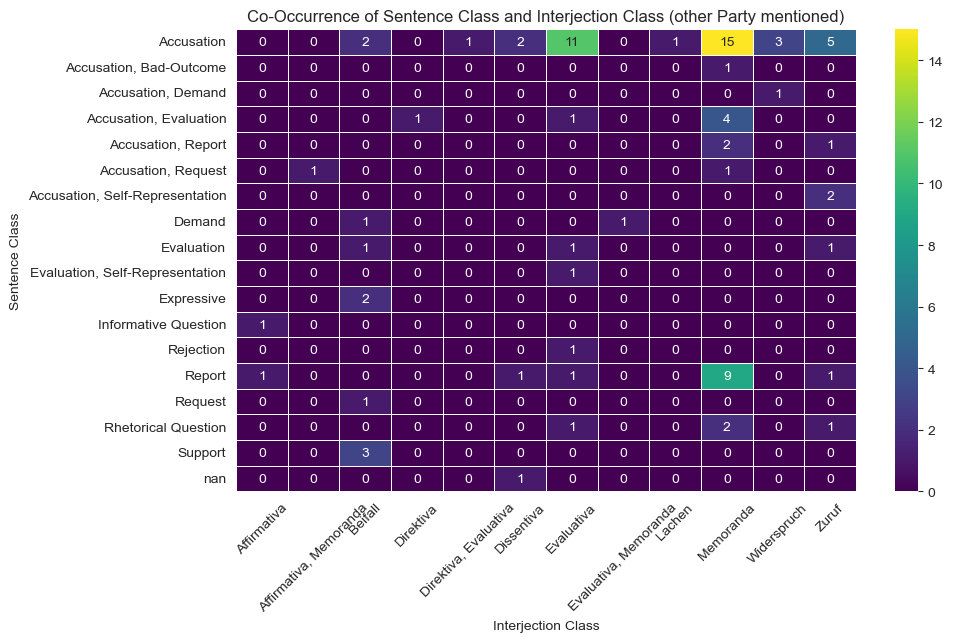

In [396]:
co_occurrence_matrix = classified_other.groupby(['Sentence Class (Reinig)', 'Interjection Class (Burkhardt)']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(co_occurrence_matrix, annot=True, fmt="d", cmap="viridis", linewidths=0.5)

plt.xlabel("Interjection Class")
plt.ylabel("Sentence Class")
plt.title("Co-Occurrence of Sentence Class and Interjection Class (other Party mentioned)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig("plots/co_occurance_other_party_mentioned.png", dpi=300, bbox_inches="tight")
plt.show()


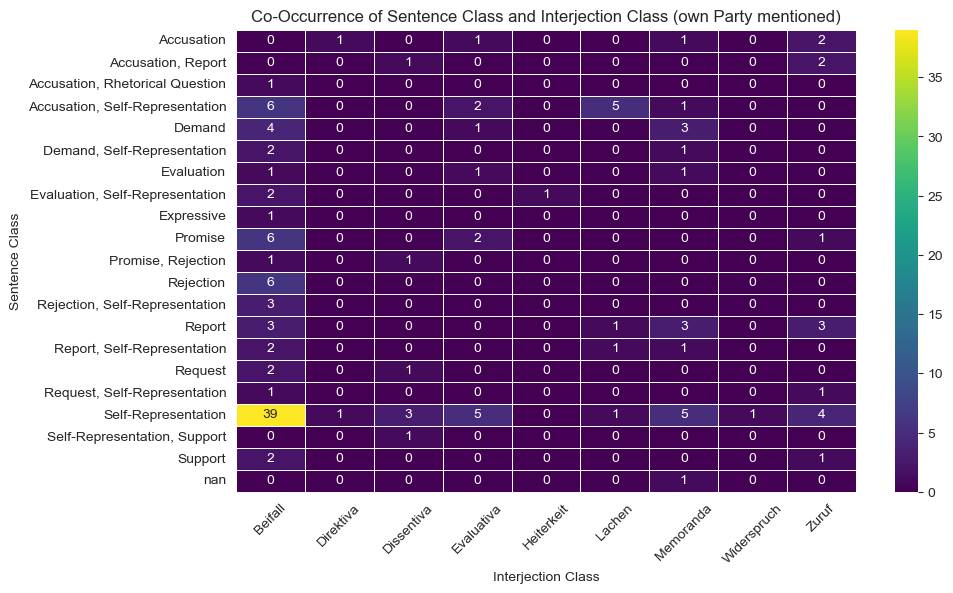

In [397]:
co_occurrence_matrix = classified_same.groupby(['Sentence Class (Reinig)', 'Interjection Class (Burkhardt)']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(co_occurrence_matrix, annot=True, fmt="d", cmap="viridis", linewidths=0.5)

plt.xlabel("Interjection Class")
plt.ylabel("Sentence Class")
plt.title("Co-Occurrence of Sentence Class and Interjection Class (own Party mentioned)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig("plots/co_occurance_own_party_mentioned.png", dpi=300, bbox_inches="tight")
plt.show()


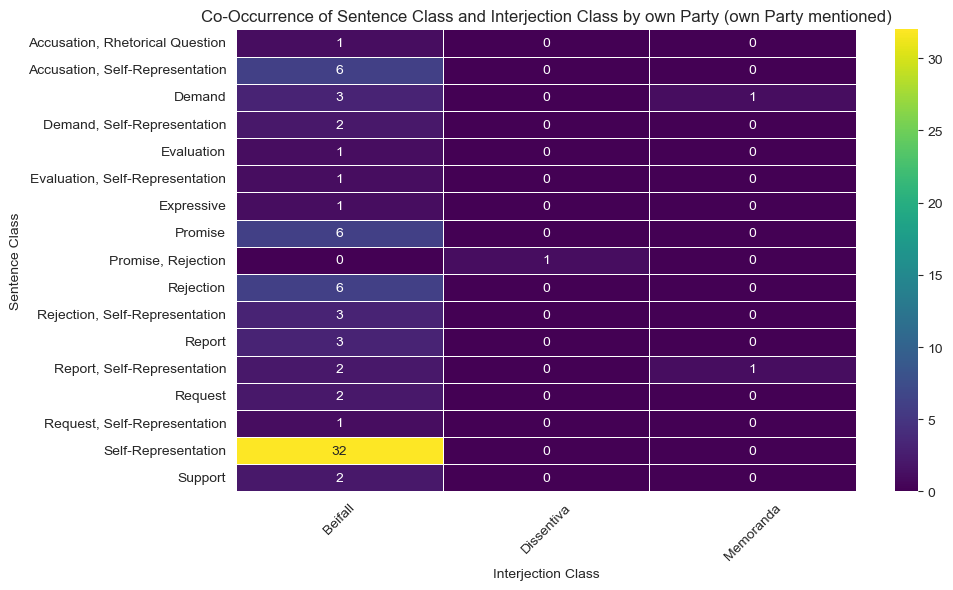

In [398]:
own_interjected = classified_same[classified_same['Speaker Interjected'] == True]
co_occurrence_matrix = own_interjected.groupby(['Sentence Class (Reinig)', 'Interjection Class (Burkhardt)']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(co_occurrence_matrix, annot=True, fmt="d", cmap="viridis", linewidths=0.5)

plt.xlabel("Interjection Class")
plt.ylabel("Sentence Class")
plt.title("Co-Occurrence of Sentence Class and Interjection Class by own Party (own Party mentioned)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig("plots/co_occurance_own_party_mentioned_own_interjection.png", dpi=300, bbox_inches="tight")
plt.show()


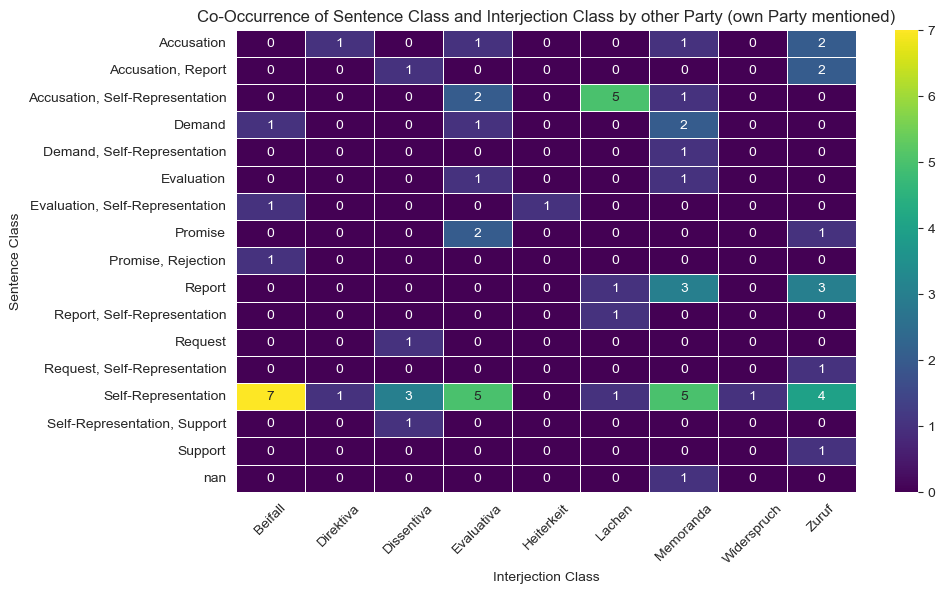

In [399]:
other_interjected = classified_same[classified_same['Speaker Interjected'] == False]
co_occurrence_matrix = other_interjected.groupby(['Sentence Class (Reinig)', 'Interjection Class (Burkhardt)']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(co_occurrence_matrix, annot=True, fmt="d", cmap="viridis", linewidths=0.5)

plt.xlabel("Interjection Class")
plt.ylabel("Sentence Class")
plt.title("Co-Occurrence of Sentence Class and Interjection Class by other Party (own Party mentioned)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig("plots/co_occurance_own_party_mentioned_other_interjection.png", dpi=300, bbox_inches="tight")
plt.show()
